In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN as SklearnDBSCAN
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("../data/Training_data/X_train.csv")


In [3]:
data.columns

Index(['lat', 'lon', 'Fall_PSurf_mean', 'Spring_PSurf_mean',
       'Summer_PSurf_mean', 'Winter_PSurf_mean', 'Fall_Rainf_mean',
       'Spring_Rainf_mean', 'Summer_Rainf_mean', 'Winter_Rainf_mean',
       'Fall_Snowf_mean', 'Spring_Snowf_mean', 'Summer_Snowf_mean',
       'Winter_Snowf_mean', 'Fall_Tair_mean', 'Spring_Tair_mean',
       'Summer_Tair_mean', 'Winter_Tair_mean', 'Fall_Wind_mean',
       'Spring_Wind_mean', 'Summer_Wind_mean', 'Winter_Wind_mean',
       'index_right', 'sand % topsoil', 'sand % subsoil', 'silt % topsoil',
       'silt% subsoil', 'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
       'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
       'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
       'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
       'C/N topsoil', 'C/N subsoil'],
      dtype='object')

In [4]:

# Select relevant features for clustering (example: first few numerical columns)
features = [ "Spring_Tair_mean", "Spring_Rainf_mean", "Spring_Wind_mean", 'Spring_PSurf_mean']
X = data[features].dropna()

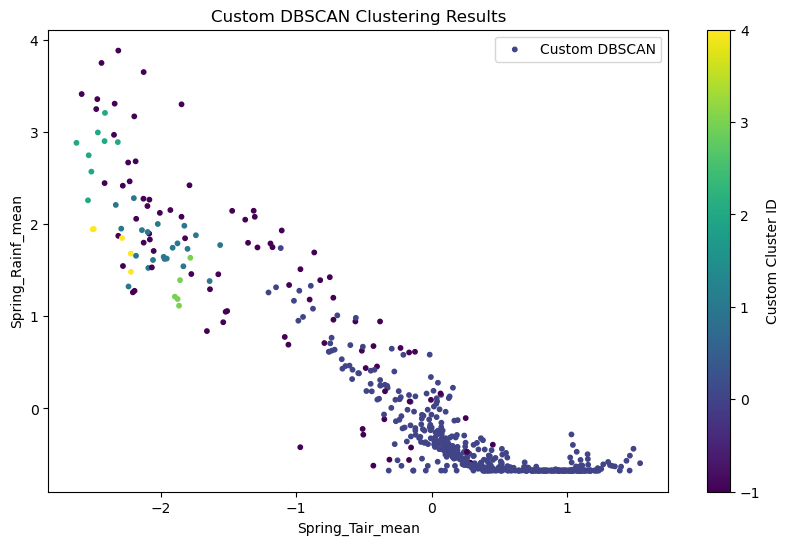

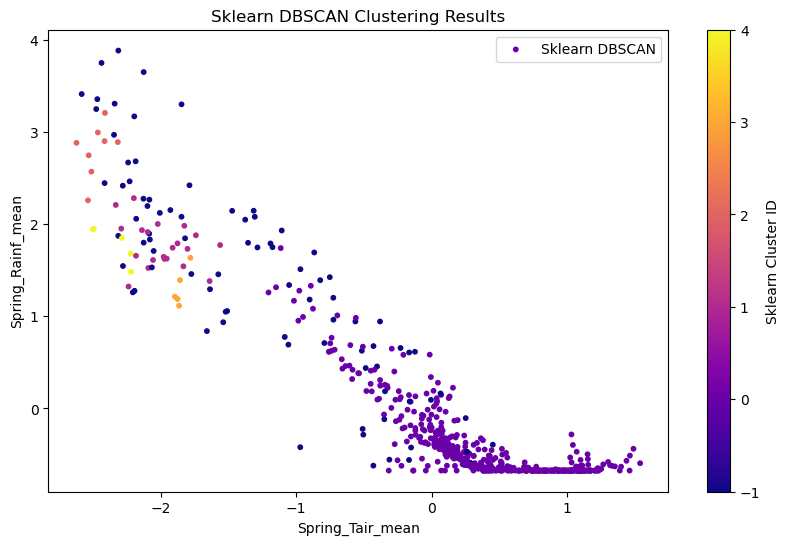

In [5]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement DBSCAN from scratch
def dbscan(X, eps, min_samples):
    n_points = X.shape[0]
    labels = -np.ones(n_points, dtype=int)  # Initialize all labels to -1 (unvisited) as integers
    cluster_id = 0

    # Helper function: calculate neighbors
    def region_query(point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= eps)[0]

    # Helper function: expand cluster
    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:  # Unvisited point
                labels[neighbor_idx] = cluster_id
                new_neighbors = region_query(neighbor_idx)
                if len(new_neighbors) >= min_samples:
                    neighbors = np.append(neighbors, new_neighbors)
            elif labels[neighbor_idx] == -1:  # Noise becomes part of cluster
                labels[neighbor_idx] = cluster_id
            i += 1

    # Main loop
    for point_idx in range(n_points):
        if labels[point_idx] != -1:
            continue  # Already processed
        neighbors = region_query(point_idx)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(point_idx, neighbors)

    # Adjust cluster IDs to start from 0 instead of 1
    labels[labels != -1] -= 1

    return labels

# Parameters for DBSCAN
eps = 0.5
min_samples = 5

# Apply custom DBSCAN
labels_custom = dbscan(X_scaled, eps, min_samples)

# Apply sklearn DBSCAN
sklearn_dbscan = SklearnDBSCAN(eps=eps, min_samples=min_samples)
labels_sklearn = sklearn_dbscan.fit_predict(X_scaled)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Custom_Cluster": labels_custom,
    "Sklearn_Cluster": labels_sklearn
})

# Save results to a separate CSV file
results_df.to_csv("dbscan_results_only.csv", index=False)

# Visualize clustering results (2D projection of the first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_custom, cmap="viridis", s=10, label="Custom DBSCAN")
plt.colorbar(label="Custom Cluster ID")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Custom DBSCAN Clustering Results")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_sklearn, cmap="plasma", s=10, label="Sklearn DBSCAN")
plt.colorbar(label="Sklearn Cluster ID")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Sklearn DBSCAN Clustering Results")
plt.legend()
plt.show()


In [6]:
results_df['Sklearn_Cluster'].value_counts()

Sklearn_Cluster
 0    473
-1     85
 1     21
 2      8
 4      5
 3      5
Name: count, dtype: int64

In [7]:
results_df['Custom_Cluster'].value_counts()

Custom_Cluster
 0    473
-1     85
 1     21
 2      8
 4      5
 3      5
Name: count, dtype: int64

<Axes: >

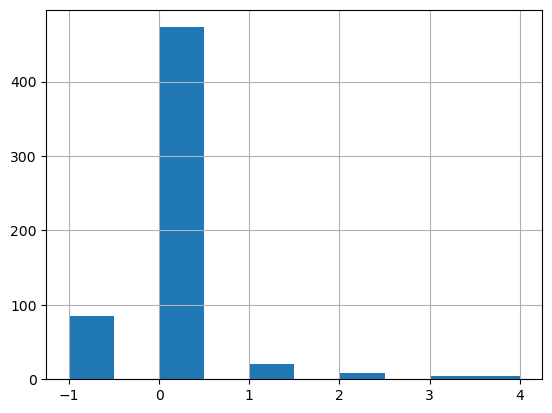

In [8]:
results_df['Custom_Cluster'].hist()


In [ ]:
# Standardize the data
# Utilise StandardScaler pour centrer et réduire les données en appliquant (X - moyenne) / écart-type.
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Implement DBSCAN from scratch
# Fonction pour implémenter l'algorithme DBSCAN depuis zéro.
def dbscan(X, eps, min_samples):
    n_points = X.shape[0]  # Nombre total de points dans les données
    labels = -np.ones(n_points, dtype=int)  # Initialisation des étiquettes à -1 (non visitées)
    cluster_id = 0  # Identifiant initial pour les clusters

    # Helper function: calculate neighbors
    # Calcule les points voisins dans un rayon `eps` autour d'un point donné
    def region_query(point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)  # Distance euclidienne
        return np.where(distances <= eps)[0]  # Retourne les indices des voisins

    # Helper function: expand cluster
    # Étend un cluster en ajoutant des points voisins
    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id  # Permet d'accéder à la variable `cluster_id` définie en dehors de la fonction
        labels[point_idx] = cluster_id  # Marque le point comme appartenant au cluster actuel
        i = 0
        while i < len(neighbors):  # Parcourt les voisins
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:  # Si le point n'a pas encore été visité
                labels[neighbor_idx] = cluster_id  # Ajoute au cluster actuel
                new_neighbors = region_query(neighbor_idx)  # Trouve les voisins du voisin
                if len(new_neighbors) >= min_samples:  # Vérifie si c'est un point cœur
                    neighbors = np.append(neighbors, new_neighbors)  # Ajoute ces voisins
            elif labels[neighbor_idx] == -1:  # Point de bruit, ajoute au cluster
                labels[neighbor_idx] = cluster_id
            i += 1

    # Main loop
    # Parcourt tous les points pour identifier les clusters
    for point_idx in range(n_points):
        if labels[point_idx] != -1:
            continue  # Point déjà traité
        neighbors = region_query(point_idx)  # Trouve les voisins
        if len(neighbors) < min_samples:
            labels[point_idx] = -1  # Marque comme bruit si pas assez de voisins
        else:
            cluster_id += 1  # Démarre un nouveau cluster
            expand_cluster(point_idx, neighbors)

    # Ajuste les IDs des clusters pour commencer à partir de 0
    labels[labels != -1] -= 1

    return labels  # Retourne les étiquettes des clusters

# Parameters for DBSCAN
# Paramètres pour l'algorithme : rayon de recherche `eps` et nombre minimal de points
eps = 0.5
min_samples = 5

# Apply custom DBSCAN
# Applique l'implémentation personnalisée de DBSCAN
labels_custom = dbscan(X_scaled, eps, min_samples)

# Apply sklearn DBSCAN
# Applique DBSCAN à partir de la bibliothèque sklearn pour comparaison
sklearn_dbscan = SklearnDBSCAN(eps=eps, min_samples=min_samples)
labels_sklearn = sklearn_dbscan.fit_predict(X_scaled)

# Create a DataFrame to store the results
# Crée un DataFrame pour comparer les étiquettes des clusters des deux approches
results_df = pd.DataFrame({
    "Custom_Cluster": labels_custom,
    "Sklearn_Cluster": labels_sklearn
})

# Save results to a separate CSV file
# Sauvegarde les résultats dans un fichier CSV
results_df.to_csv("dbscan_results_only.csv", index=False)

# Visualize clustering results (2D projection of the first two features)
# Visualisation des résultats de clustering avec les deux premières dimensions
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_custom, cmap="viridis", s=10, label="Custom DBSCAN")
plt.colorbar(label="Custom Cluster ID")
plt.xlabel(features[0])  # Nom de la première caractéristique
plt.ylabel(features[1])  # Nom de la deuxième caractéristique
plt.title("Custom DBSCAN Clustering Results")
plt.legend()
plt.show()

# Visualisation pour l'implémentation sklearn
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_sklearn, cmap="plasma", s=10, label="Sklearn DBSCAN")
plt.colorbar(label="Sklearn Cluster ID")
plt.xlabel(features[0])
plt.ylabel
